# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
cities_csv = pd.read_csv(output_data_file)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("-------------------------")
i = 0
valid_cities = []
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    try:
        response = requests.get(query_url).json()
        testcon = response['clouds']['all']
        i = i + 1
        iset = int(i/50) + 1
        cityid = i - ((iset - 1) * 50)
        print(f"Processing Record {cityid} of Set {iset} | {city}")
        valid_cities.append(city)
    except (KeyError, IndexError):
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | muros
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | vila
Processing Record 8 of Set 1 | samarai
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | severo-kurilsk
City not found. Skipping...
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | morondava
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | kayes
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | kasane
Processing Record 23 of Set 1 | lavrentiy

Processing Record 38 of Set 4 | adrar
Processing Record 39 of Set 4 | big spring
Processing Record 40 of Set 4 | umba
Processing Record 41 of Set 4 | jining
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | yellowknife
City not found. Skipping...
Processing Record 44 of Set 4 | slave lake
Processing Record 45 of Set 4 | mount isa
Processing Record 46 of Set 4 | hudiksvall
City not found. Skipping...
Processing Record 47 of Set 4 | maceio
Processing Record 48 of Set 4 | poum
Processing Record 49 of Set 4 | los llanos de aridane
Processing Record 0 of Set 5 | cherskiy
Processing Record 1 of Set 5 | mecca
Processing Record 2 of Set 5 | luganville
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | aksarka
Processing Record 5 of Set 5 | yuanping
Processing Record 6 of Set 5 | copiapo
Processing Record 7 of Set 5 | itarema
Processing Record 8 of Set 5 | ahuimanu
Processing Record 9 of Set 5 | port elizabeth
Processing Record 10 of Set 5 | torbay
Pro

Processing Record 31 of Set 8 | ola
Processing Record 32 of Set 8 | bilma
Processing Record 33 of Set 8 | ust-tarka
Processing Record 34 of Set 8 | vostok
Processing Record 35 of Set 8 | le vauclin
Processing Record 36 of Set 8 | meulaboh
Processing Record 37 of Set 8 | mineros
Processing Record 38 of Set 8 | melito di porto salvo
Processing Record 39 of Set 8 | port shepstone
Processing Record 40 of Set 8 | winton
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | liverpool
Processing Record 43 of Set 8 | mayo
Processing Record 44 of Set 8 | opuwo
City not found. Skipping...
Processing Record 45 of Set 8 | werda
Processing Record 46 of Set 8 | santiago del estero
Processing Record 47 of Set 8 | paita
Processing Record 48 of Set 8 | san carlos de bariloche
Processing Record 49 of Set 8 | little current
Processing Record 0 of Set 9 | puerto madero
City not found. Skipping...
Processing Record 1 of Set 9 | alofi
Processing Record 2 of Set 9 | deputatskiy
Processin

Processing Record 18 of Set 12 | chicama
-------------------------
Data Retrieval Complete
-------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Loading valid cities into dataframe
city_pd = pd.DataFrame({'city': valid_cities})

city_pd['Lat'] = ""
city_pd['Lng'] = ""
city_pd['Max Temp'] = ""
city_pd['Humidity'] = ""
city_pd['Cloudiness'] = ""
city_pd['Wind Speed'] = ""
city_pd['Country'] = ""
city_pd['Date'] = ""

# ============ TEST DATA =========
# city = "okha"
# query_url = url + "appid=" + weather_api_key + "&q=" + city
# requests.get(query_url).json()
# ================================

for index, row in city_pd.iterrows():
    city = row['city']
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    city_pd.loc[index, 'Lat'] = response['coord']['lat']
    city_pd.loc[index, 'Lng'] = response['coord']['lon']
    city_pd.loc[index, 'Max Temp'] = response['main']['temp_max']
    city_pd.loc[index, 'Humidity'] = response['main']['humidity']
    city_pd.loc[index, 'Cloudiness'] = response['clouds']['all']
    city_pd.loc[index, 'Wind Speed'] = response['wind']['speed']
    city_pd.loc[index, 'Country'] = response['sys']['country']
    city_pd.loc[index, 'Date'] = response['dt']
city_pd.to_csv(output_data_file)
city_pd.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muros,42.7762,-9.0603,285.2,83,100,4.74,ES,1647933467
1,puerto ayora,-0.7393,-90.3518,299.57,92,86,2.24,EC,1647933467
2,rikitea,-23.1203,-134.9692,299.68,70,6,5.68,PF,1647933467
3,busselton,-33.65,115.3333,297.47,35,2,2.33,AU,1647933468
4,kruisfontein,-34.0033,24.7314,294.2,62,65,1.62,ZA,1647933468


In [5]:
# Remove object columns
city_statistics = city_pd[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]

# Change columns type to numbers for statistics calculations

city_statistics = city_statistics.astype({"Lat": 'float64', 
                                          "Lng": 'float64', 
                                          "Max Temp": 'float64', 
                                          "Humidity": 'float64', 
                                          "Cloudiness": 'float64', 
                                          "Wind Speed": 'float64',
                                          "Date": 'int64'})
city_statistics.describe(include='all')

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,20.799770,11.209364,286.485211,72.068662,57.343310,3.894965,1.647934e+09
std,33.458699,91.078236,13.829227,21.238393,41.366347,2.678526,6.118224e+01
min,-54.800000,-175.200000,242.370000,1.000000,0.000000,0.000000,1.647933e+09
25%,-7.874300,-68.353625,276.747500,62.750000,12.000000,1.867500,1.647934e+09
50%,26.187400,14.605950,288.920000,76.000000,71.500000,3.125000,1.647934e+09
75%,49.327075,82.621300,297.550000,87.000000,100.000000,5.652500,1.647934e+09
max,78.218600,178.416700,311.180000,100.000000,100.000000,14.750000,1.647934e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Check for cities with humidity over 100%
extreme_humidity = False
city_pd = city_pd.astype({"Lat": 'float64', 
                          "Lng": 'float64', 
                          "Max Temp": 'float64', 
                          "Humidity": 'float64', 
                          "Cloudiness": 'float64', 
                          "Wind Speed": 'float64',
                          "Date": 'int64'})

city_data = city_pd.loc[(city_pd['Humidity']) <= 100 , :]
if (len(city_data) == len(city_pd)):
    print("No cities with humidity over 100% found")
else:
    city_high_humidity = city_pd.loc[(city_pd['Humidity']) > 100 , :]
    extreme_humidity = True
    print(f"{len(city_pd)-len(city_data)} cities with humidity over 100% found")
    city_statistics.describe(include='all')

No cities with humidity over 100% found


In [8]:
#  Get the indices of cities that have humidity over 100%.
if extreme_humidity == True:
    city_high_humidity

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data
clean_city_data.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muros,42.7762,-9.0603,285.20,83.0,100.0,4.74,ES,1647933467
1,puerto ayora,-0.7393,-90.3518,299.57,92.0,86.0,2.24,EC,1647933467
2,rikitea,-23.1203,-134.9692,299.68,70.0,6.0,5.68,PF,1647933467
3,busselton,-33.6500,115.3333,297.47,35.0,2.0,2.33,AU,1647933468
4,kruisfontein,-34.0033,24.7314,294.20,62.0,65.0,1.62,ZA,1647933468


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
max_temp_f = []
for i in clean_city_data['Max Temp']:
    max_temp_f.append(1.8*(i - 273)+32)
clean_city_data['Max Temp F'] = max_temp_f

In [11]:
clean_city_data

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp F
0,muros,42.7762,-9.0603,285.20,83.0,100.0,4.74,ES,1647933467,53.960
1,puerto ayora,-0.7393,-90.3518,299.57,92.0,86.0,2.24,EC,1647933467,79.826
2,rikitea,-23.1203,-134.9692,299.68,70.0,6.0,5.68,PF,1647933467,80.024
3,busselton,-33.6500,115.3333,297.47,35.0,2.0,2.33,AU,1647933468,76.046
4,kruisfontein,-34.0033,24.7314,294.20,62.0,65.0,1.62,ZA,1647933468,70.160
...,...,...,...,...,...,...,...,...,...,...
563,tombouctou,20.0000,-3.0000,291.48,22.0,0.0,4.92,ML,1647933610,65.264
564,rosario,-32.9468,-60.6393,292.10,95.0,0.0,3.09,AR,1647933611,66.380
565,joniskis,56.2403,23.6153,279.66,60.0,0.0,1.61,LT,1647933611,43.988
566,pangoa,-12.1167,-73.0000,292.26,99.0,100.0,1.01,PE,1647933611,66.668


In [12]:
today = pd.to_datetime('today').strftime("%d/%m/%y")
invalid_characters = [",", "/", " "]

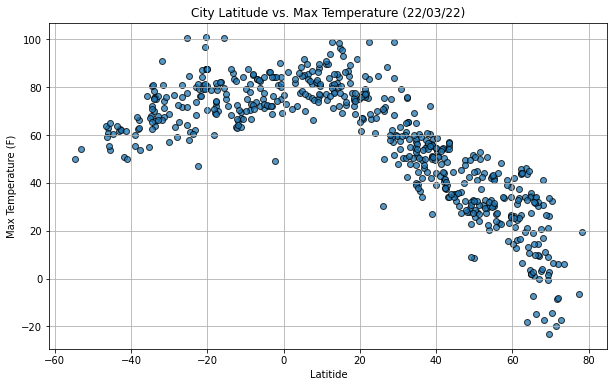

In [13]:
lat_sort = clean_city_data['Lat'].reset_index(drop=True)
x_limit = clean_city_data['Lat'].max()
x_limit_min = int(clean_city_data['Lat'].min())
y_values = np.round(clean_city_data['Max Temp F'], 2)
x_axis = clean_city_data['Lat']
plt_title = f"City Latitude vs. Max Temperature ({today})"
   
plt.figure(figsize=(10, 6))
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitide")
plt.ylabel("Max Temperature (F)")

plt.scatter(x_axis, y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)
plt.grid(True)


# Removing invalid characters from title to allow title to used as filename
filename = plt_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

## Latitude vs. Humidity Plot

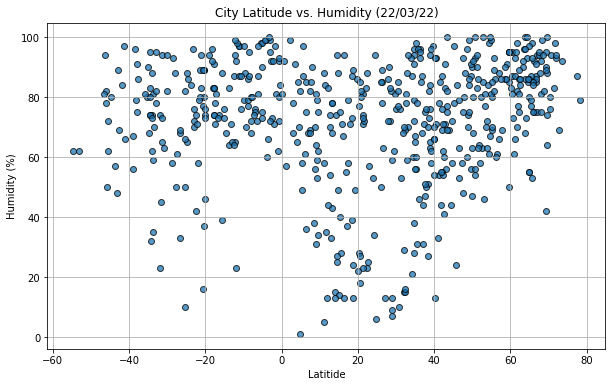

In [14]:
lat_sort = clean_city_data['Lat'].reset_index(drop=True)
x_limit = clean_city_data['Lat'].max()
x_limit_min = int(clean_city_data['Lat'].min())
y_values = np.round(clean_city_data['Humidity'], 2)
x_axis = clean_city_data['Lat']
plt.figure(figsize=(10, 6))

plt_title = f"City Latitude vs. Humidity ({today})"
plt.title(plt_title)

plt.xlabel("Latitide")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)
plt.grid(True)

# Removing invalid characters from title to allow title to used as filename
filename = plt_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

## Latitude vs. Cloudiness Plot

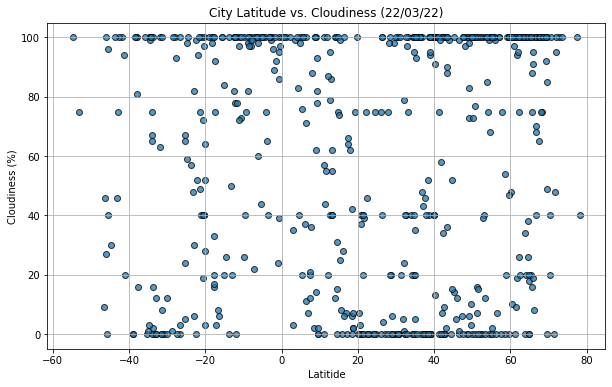

In [15]:
lat_sort = clean_city_data['Lat'].reset_index(drop=True)
x_limit = clean_city_data['Lat'].max()
x_limit_min = int(clean_city_data['Lat'].min())
y_values = np.round(clean_city_data['Cloudiness'], 2)
x_axis = clean_city_data['Lat']
plt.figure(figsize=(10, 6))

plt_title = f"City Latitude vs. Cloudiness ({today})"
plt.title(plt_title)

plt.xlabel("Latitide")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)

plt.grid(True)

# Removing invalid characters from title to allow title to used as filename
filename = plt_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

## Latitude vs. Wind Speed Plot

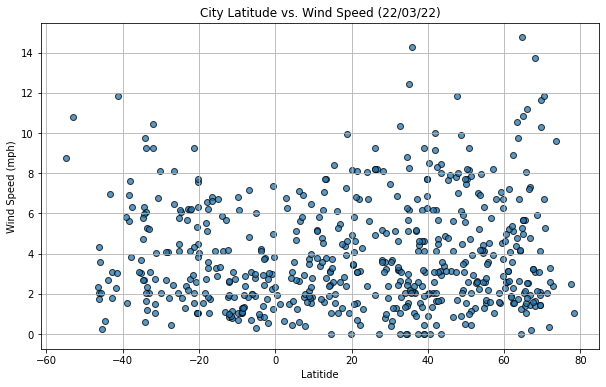

In [16]:
lat_sort = clean_city_data['Lat'].reset_index(drop=True)
x_limit = clean_city_data['Lat'].max()
x_limit_min = int(clean_city_data['Lat'].min())
y_values = np.round(clean_city_data['Wind Speed'], 2)
x_axis = clean_city_data['Lat']
plt.figure(figsize=(10, 6))
plt_title = f"City Latitude vs. Wind Speed ({today})"
plt.title(plt_title)
plt.xlabel("Latitide")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)

plt.grid(True)

# Removing invalid characters from title to allow title to used as filename
filename = plt_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

## Linear Regression

In [17]:
import scipy.stats as st
from scipy.stats import linregress
Nth_hemp = clean_city_data.loc[(clean_city_data['Lat']) > 0 , :]
Sth_hemp = clean_city_data.loc[(clean_city_data['Lat']) < 0 , :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8020612290745862
Line Equation: y = -0.65x + 307.94


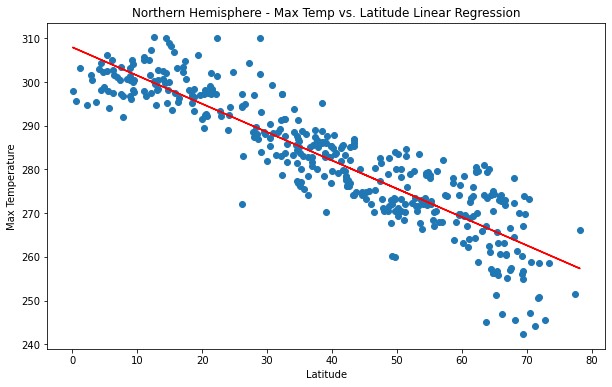

In [18]:
y_axis = Nth_hemp['Max Temp']
latitude = Nth_hemp['Lat']
correlation = st.pearsonr(latitude, y_axis)
x_label = f"Latitude"
y_label = f"Max Temperature"
plot_title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, y_axis)
regress_values = (latitude * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(latitude, y_axis)
plt.plot(latitude, regress_values, "r-")
# plt.annotate(line_eq,(45, 300),fontsize=12,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
print(f"The r-squared is: {rvalue**2}")
print(f"Line Equation: {line_eq}")

# Removing invalid characters from title to allow title to used as filename
filename = plot_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.23001893054010525
Line Equation: y = 0.21x + 300.17


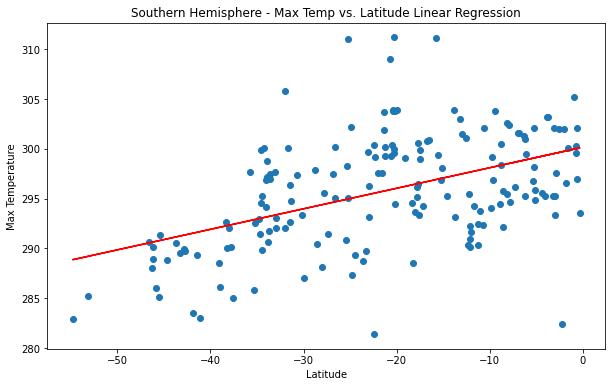

In [26]:
y_axis = Sth_hemp['Max Temp']
latitude = Sth_hemp['Lat']
correlation = st.pearsonr(latitude, y_axis)
x_label = f"Latitude"
y_label = f"Max Temperature"
plot_title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, y_axis)
regress_values = (latitude * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(latitude, y_axis)
plt.plot(latitude, regress_values, "r-")
# plt.annotate(line_eq,(-20, 283),fontsize=12,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
print(f"The r-squared is: {rvalue**2}")
print(f"Line Equation: {line_eq}")

filename = plot_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1459587770248181
Line Equation: y = 0.44x + 53.09


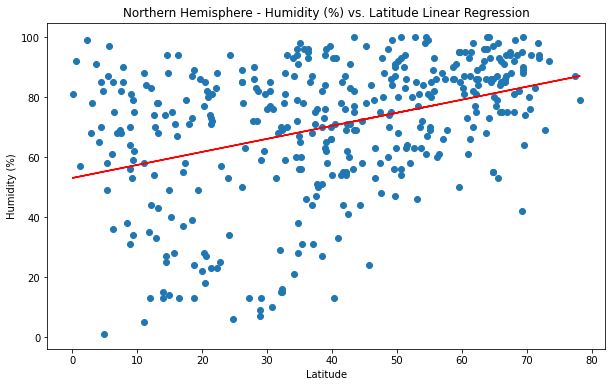

In [27]:
y_axis = Nth_hemp['Humidity']
latitude = Nth_hemp['Lat']
correlation = st.pearsonr(latitude, y_axis)
x_label = f"Latitude"
y_label = f"Humidity (%)"
plot_title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, y_axis)
regress_values = (latitude * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(latitude, y_axis)
plt.plot(latitude, regress_values, "r-")
# plt.annotate(line_eq,(52, 15),fontsize=12,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
print(f"The r-squared is: {rvalue**2}")
print(f"Line Equation: {line_eq}")

filename = plot_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05492240384123973
Line Equation: y = 0.3x + 82.41


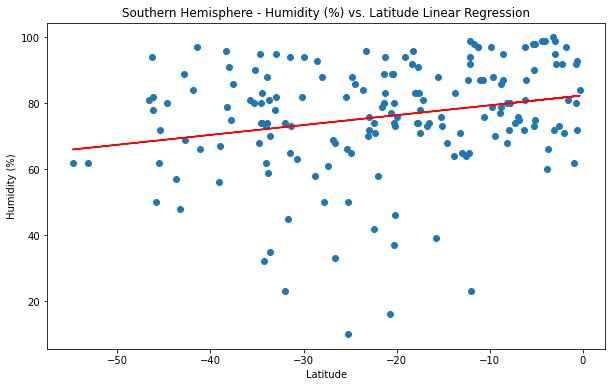

In [28]:
y_axis = Sth_hemp['Humidity']
latitude = Sth_hemp['Lat']
correlation = st.pearsonr(latitude, y_axis)
x_label = f"Latitude"
y_label = f"Humidity (%)"
plot_title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, y_axis)
regress_values = (latitude * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(latitude, y_axis)
plt.plot(latitude, regress_values, "r-")
# plt.annotate(line_eq,(-15, 35),fontsize=12,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
print(f"The r-squared is: {rvalue**2}")
print(f"Line Equation: {line_eq}")

filename = plot_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.028120093651042927
Line Equation: y = 0.36x + 40.41


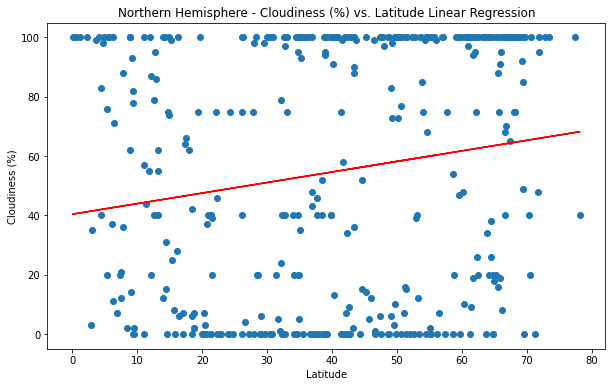

In [29]:
y_axis = Nth_hemp['Cloudiness']
latitude = Nth_hemp['Lat']
correlation = st.pearsonr(latitude, y_axis)
x_label = f"Latitude"
y_label = f"Cloudiness (%)"
plot_title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, y_axis)
regress_values = (latitude * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(latitude, y_axis)
plt.plot(latitude, regress_values, "r-")
# plt.annotate(line_eq,(76.5, 47),fontsize=12,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
print(f"The r-squared is: {rvalue**2}")
print(f"Line Equation: {line_eq}")

filename = plot_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0791489122300379
Line Equation: y = 0.82x + 81.26


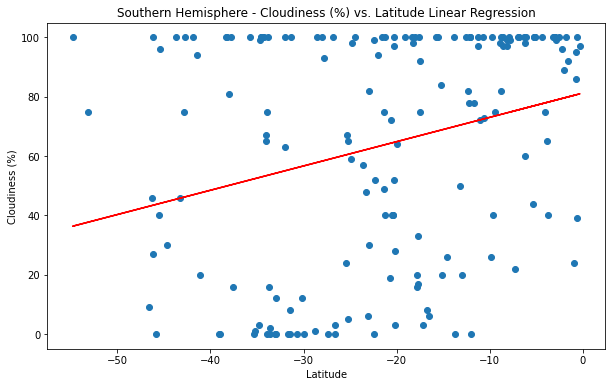

In [30]:
y_axis = Sth_hemp['Cloudiness']
latitude = Sth_hemp['Lat']
correlation = st.pearsonr(latitude, y_axis)
x_label = f"Latitude"
y_label = f"Cloudiness (%)"
plot_title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, y_axis)
regress_values = (latitude * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(latitude, y_axis)
plt.plot(latitude, regress_values, "r-")
# plt.annotate(line_eq,(-7, 44),fontsize=12,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
print(f"The r-squared is: {rvalue**2}")
print(f"Line Equation: {line_eq}")

filename = plot_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.010330377156477336
Line Equation: y = 0.01x + 3.44


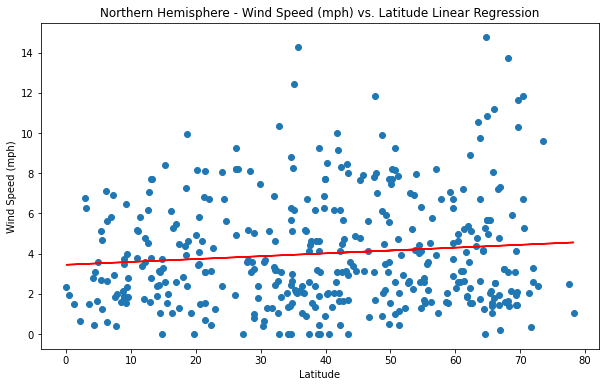

In [31]:
y_axis = Nth_hemp['Wind Speed']
latitude = Nth_hemp['Lat']
correlation = st.pearsonr(latitude, y_axis)
x_label = f"Latitude"
y_label = f"Wind Speed (mph)"
plot_title = f"Northern Hemisphere - {y_label} vs. Latitude Linear Regression"
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, y_axis)
regress_values = (latitude * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(latitude, y_axis)
plt.plot(latitude, regress_values, "r-")
# plt.annotate(line_eq,(25, 17),fontsize=12,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
print(f"The r-squared is: {rvalue**2}")
print(f"Line Equation: {line_eq}")

filename = plot_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0743344867427927
Line Equation: y = -0.05x + 2.59


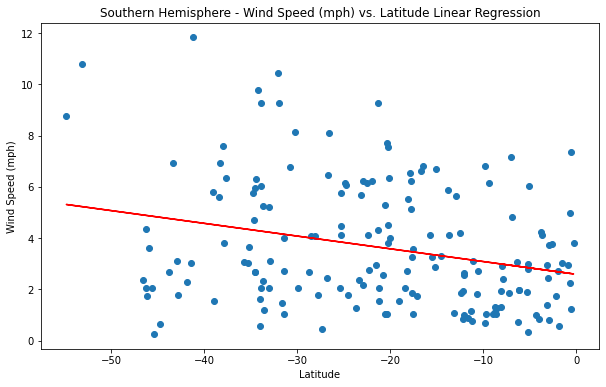

In [32]:
y_axis = Sth_hemp['Wind Speed']
latitude = Sth_hemp['Lat']
correlation = st.pearsonr(latitude, y_axis)
x_label = f"Latitude"
y_label = f"Wind Speed (mph)"
plot_title = f"Southern Hemisphere - {y_label} vs. Latitude Linear Regression"
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, y_axis)
regress_values = (latitude * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(latitude, y_axis)
plt.plot(latitude, regress_values, "r-")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
print(f"The r-squared is: {rvalue**2}")
print(f"Line Equation: {line_eq}")
filename = plot_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()